<a href="https://colab.research.google.com/github/ShriShalini/Time-Series-Forecasting/blob/main/extreme_loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install darts

In [1]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.1.3
Uninstalling matplotlib-3.1.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.1.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.1.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)?   ERROR: Operation cancelled by user


In [16]:
import matplotlib.pyplot as plt
import pandas as pd
series_ai = pd.read_csv('ai_count_no_ouliers.csv')

In [4]:
from darts.dataprocessing.transformers import Scaler
from darts import TimeSeries
scaler_ai_retweet = Scaler()

series_ai_count = scaler_ai_retweet.fit_transform(
        TimeSeries.from_dataframe(
            series_ai, 'date', ['count'])
    ) 
# series_ai_count.plot(label ='count')
# plt.xlabel('date')
# plt.ylabel('tweet_count')
# fig1 = plt.gcf()
# plt.legend();
# plt.show()
#fig1.savefig('tweet_count.png')



In [5]:
train_tweet_count, val_tweet_count = series_ai_count.split_after(pd.Timestamp('20200930'))

import torch

In [ ]:
def extreme_true(pred,true):
  #define the hi_th anf lw_th
  hi_th = 0.65
  lw_th = 0.2
  if (pred>hi_th or pred <lw_th)  and (true <= hi_th and true >=lw_th):
    return True
  elif (true>hi_th or true <lw_th)  and (pred <= hi_th or pred >=lw_th):
    return True
  else:
    return False  
    



In [ ]:
def ExtremeLoss(preds, true):
    extreme_tensor(preds,true)
"""     
   # define the upper and the lower thresholds
  loss = list(range(0,preds.shape[0]))
   # 1st loop for the batch
  batch_counter =0  
  for pred in preds:
    
     #pred is a tensor of 7 dimsneions 
     #2nd loop for dims in the tensor
     dim_counter = -1 
     for dim in pred :
       dim_counter +=1
       if extreme_true(dim,true[batch_counter][dim_counter] ) == True:
        # extreme loss
          loss[batch_counter] += (dim - true[batch_counter][dim_counter])*4
       else:
        #simple loss
          loss[batch_counter] += (dim - true[batch_counter][dim_counter]) 

     batch_counter +=1
  loss_tensor = torch.tensor(loss, requires_grad= True)
  #print(loss_tensor) 
  return torch.sum(loss_tensor)
"""

'     \n   # define the upper and the lower thresholds\n  loss = list(range(0,preds.shape[0]))\n   # 1st loop for the batch\n  batch_counter =0  \n  for pred in preds:\n    \n     #pred is a tensor of 7 dimsneions \n     #2nd loop for dims in the tensor\n     dim_counter = -1 \n     for dim in pred :\n       dim_counter +=1\n       if extreme_true(dim,true[batch_counter][dim_counter] ) == True:\n        # extreme loss\n          loss[batch_counter] += (dim - true[batch_counter][dim_counter])*4\n       else:\n        #simple loss\n          loss[batch_counter] += (dim - true[batch_counter][dim_counter]) \n\n     batch_counter +=1\n  loss_tensor = torch.tensor(loss, requires_grad= True)\n  #print(loss_tensor) \n  return torch.sum(loss_tensor)\n'

In [ ]:
a = []
def initialize_a(a):
  a = [0.0]
  return a

In [24]:

def try_loss(pred, true):
  #print(pred, true)
  inter = (pred - true).fill_(0)
  for i in range(0,len(inter)):
    for j in range(0,len(inter[i])):
      if((pred[i][j]<= 0.5 and pred[i][j]>=0.3 ) and (true[i][j]>0.8 or true[i][j]<0.2)):
        inter[i][j]=torch.abs((pred[i][j]-true[i][j])*15)
  intersection = torch.abs(pred - true)
  # high = pred.fill_(0.8).clone().detach().requires_grad_(True)
  # low = pred.fill_(0.2).clone().detach().requires_grad_(True)
  # val =   (high - low)
  v = (intersection+inter).mean()
  # high = pred.fill_(0.3).clone().detach().requires_grad_(True)
  # low = pred.fill_(0.2).clone().detach().requires_grad_(True)

  # intersection = (pred - high) 
  # #print(intersection)
  # #intersection = torch.max(intersection,torch.tensor([0.]))
  # # for i in range(0,len(pred)):
  # #   for j in range(0,len(pred[0])):
  # #     #print(pred_inbounds[i][j])
  # #     if((pred[i][j]<=0.8 and pred[i][j]>=0.2 ) and (true[i][j]>0.8 or true[i][j]<0.2)):
  # #       intersection[i][j]=10000
  
  
  # #val =   (high - low)
  
  # return  (pred-true).sum()
  # high = pred.fill_(0.8).clone().detach().requires_grad_(True)
  # low = pred.fill_(0.2).clone().detach().requires_grad_(True)
  # pred_inbounds = pred.clone().detach()
  # true_outbounds = true.clone().detach()
  # #print(pred_inbounds.shape)
  # for i in range(0,len(pred_inbounds)):
  #   for j in range(0,len(pred_inbounds[0])):
  #     #print(pred_inbounds[i][j])
  #     if(pred_inbounds[i][j]<=0.8 and pred_inbounds[i][j]>=0.2 ):
  #       pred_inbounds[i][j]=0
  # for i in range(0,len(true_outbounds)):
  #   for j in range(0,len(true_outbounds[0])):
  #     if(true_outbounds[i][j]>0.8 or true_outbounds[i][j]<0.2 ):
  #       true_outbounds[i][j]=0
  # intersection = (pred_inbounds-true_outbounds).clone().detach().requires_grad_(True)
  # int_gradd =  intersection.clone().detach().requires_grad_(True)

  # s = int_gradd.sum()
  # for i in range(0,len(pred_inbounds)):
  #   for j in range(0,len(pred_inbounds[0])):
  #     #print("entered")
      
  #     s =s+999
  return v
  # #print(pred.shape, true.shape)
  # a = []
  # #a = initialize_a(a)
  # import numpy as np
  # #print("print",len(pred_tensor), len(pred_tensor[0]), len(true_tensor))
  # h = 0.8
  # l = 0.2

  # loss = torch.tensor(0.0, requires_grad=True)

  # #torch.cat((A,B))
  # l = 0
  # for i in range(0,len(pred)):
  #   for j in range(0,len(pred[0])):
  #     if((true[i][j]>h or true[i][j]<l) and (pred[i][j] <= h and pred[i][j] >= l)):
  #       #temp = torch.tensor(0.0, requires_grad=True)
  #       temp = torch.abs(torch.tensor(5*(true[i][j]-pred[i][j])).clone().detach().requires_grad_(True))
  #       # loss = torch.unsqueeze(loss, 0)
  #       #temp = torch.unsqueeze(temp, 0)
  #       #print('ll',loss,temp)
  #       np_arr = temp.cpu().detach().numpy().tolist()
  #       #loss = torch.stack((temp,loss))
  #       a.append(np_arr)
  #       #print(a,len(a))
  #       #print(sum(a))
  #       #loss =  torch.add(loss,temp)
  #     else:
  #       temp = torch.abs(torch.tensor(true[i][j]-pred[i][j]).clone().detach().requires_grad_(True))
  #       np_arr = temp.cpu().detach().numpy().tolist()
  #       #loss = torch.stack((temp,loss))
  #       a.append(np_arr)
    
        
  #       #print('l',loss)
  # #loss = torch.subtract(pred_tensor,true_tensor)
  # #l = torch.mean(loss)
  # #l = l.clone().detach().requires_grad_(True)
  # #print(l)
  # #print("sum",sum(a))
  # loss = torch.tensor(sum(a)/len(a), requires_grad=True)
  # if(i == len(pred)-1):
  #     a = []
  # #print("sdf",loss)
  # return torch.mean(loss)

In [ ]:
def extreme_tensor(pred_tensor,true_tensor):
    hi_th = 0.65
    lw_th = 0.2
#    high_tensor = torch.full((pred_tensor.size[0],pred_tensor.size[1],pred_tensor.size[2]), hi_th)
#    lw_tensor = torch.full((pred_tensor.size[0],pred_tensor.size[1],pred_tensor.size[2]), lw_th)

    high_tensor = torch.full((pred_tensor.shape[0],pred_tensor.shape[1],pred_tensor.shape[2]), hi_th)
    lw_tensor = torch.full((pred_tensor.shape[0],pred_tensor.shape[1],pred_tensor.shape[2]), lw_th)
#compare the pred with the high and low_tensor
    pred_comp_hi = torch.gt(pred_tensor,high_tensor)
    pred_comp_lw = torch.le(pred_tensor,lw_tensor)

# an or to know if it is extreme or not  
    extreme_pred = torch.logical_or(pred_comp_hi,pred_comp_lw)
#compare the true with the high and low
    true_comp_hi = torch.le(true_tensor,high_tensor)
    true_comp_lw = torch.gt(true_tensor,lw_tensor)

# an and to know if it is extreme or not
    extreme_true = torch.logical_and(true_comp_hi,true_comp_lw)
#get the and of the 2 above

    extreme_final = torch.logical_and(extreme_pred,extreme_true)

  #get the diff from the pred and true
    true_comp_hi_2 = torch.gt(true_tensor,high_tensor)
    true_comp_lw_2 = torch.le(true_tensor,lw_tensor)
    
    true_or = torch.logical_or(true_comp_hi_2,true_comp_lw_2)
    
    pred_comp_hi_2 = torch.le(pred_tensor,high_tensor)
    pred_comp_lw_2 = torch.gt(pred_tensor,lw_tensor)
    
    pred_or = torch.logical_or(pred_comp_hi_2,pred_comp_lw_2)
    # an and to know if it is extreme or not
    extreme_final_2 = torch.logical_and(true_or,pred_or)
    
  # change the values of the true and false to the hyperparamters of the loss

    boolean_tensor = torch.logical_or(extreme_final,extreme_final_2)
    int_tensor = boolean_tensor.long()
    
  # change the boolean tensor with values
    x = torch.where(int_tensor==1,int_tensor, 5)
    x = x.double()
    final_tensor = torch.where(x==0, x ,0.2)

# element-wise subtraction
    loss_tensor = torch.subtract(pred_tensor,true_tensor)

#element-wise mul of loss with 
    product = torch.mul(loss_tensor, final_tensor)
    product = torch.tensor(product, requires_grad=True)
    #print(product.shape)
    #print((-torch.sum(product)))
    
    return(torch.sum(product))

In [ ]:
def try_mape(pred, true):
  loss = torch.tensor(0.9, requires_grad=True)
  return torch.mean(loss)


In [7]:
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel
from darts.metrics import mape, smape

In [ ]:
model_ai = NBEATSModel(input_chunk_length=60, output_chunk_length=7, n_epochs=100, random_state=0,
                                          loss_fn = try_loss,  )
model_ai.fit([train_tweet_count],val_series = [val_tweet_count], verbose=True)
pred_ai = model_ai.predict(n=88, series = train_tweet_count )
#pred_follower = model_ai_multiple.predict(n=36, series = train_follower )
error_tweet = mape(val_tweet_count[:88],pred_ai)
#error_follower = mape(val_follower[:36],pred_follower)
print("this is the error for the tweet_count:",error_tweet )

[2021-12-14 15:36:56,856] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 208 samples.
[2021-12-14 15:36:56,856] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 208 samples.
[2021-12-14 15:36:56,978] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2021-12-14 15:36:56,978] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
  1%|          | 1/100 [00:01<02:45,  1.68s/it]

 11%|█         | 11/100 [00:17<02:18,  1.56s/it]

 21%|██        | 21/100 [00:33<02:05,  1.58s/it]

 31%|███       | 31/100 [00:48<01:48,  1.57s/it]

 35%|███▌      | 35/100 [00:54<01:41,  1.56s/it]

In [ ]:
pred_ai

<TimeSeries (DataArray) (time: 88, component: 1, sample: 1)>
array([[[ 1.04399144]],

       [[ 0.92836358]],

       [[-0.95633555]],

       [[-0.85537406]],

       [[ 2.457935  ]],

       [[ 0.51585218]],

       [[-0.1875844 ]],

       [[ 1.04415573]],

       [[ 0.9385241 ]],

       [[-0.95726137]],

...

       [[ 0.96002771]],

       [[-0.92451148]],

       [[-0.77503978]],

       [[ 1.0366294 ]],

       [[ 1.0061957 ]],

       [[-0.97059996]],

       [[-0.82868163]],

       [[ 2.49162879]],

       [[ 0.48914647]],

       [[-0.12577122]]])
Coordinates:
  * time       (time) datetime64[ns] 2020-10-01 2020-10-02 ... 2020-12-27
  * component  (component) object 'count'
Dimensions without coordinates: sample

MAPE = 48.33%


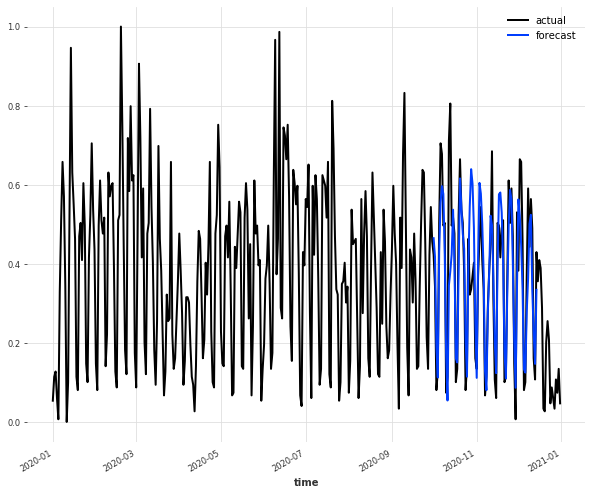

In [23]:
pred_ai = model_ai.predict(n=75, series = train_tweet_count )
#pred_follower = model_ai_multiple.predict(n=36, series = train_follower )
error_tweet = mape(val_tweet_count[:75],pred_ai)
#error_follower = mape(val_follower[:36],pred_follower)
#print("this is the error for the tweet_count:",error_tweet )
series_ai_count.plot(label='actual')
#val_retweet.plot(label= 'validation')
plt.rcParams['figure.figsize'] = [10, 8]
pred_ai.plot(label='forecast')
fig1 = plt.gcf()
plt.legend();
fig1.savefig('forecast_75_days.png')
print('MAPE = {:.2f}%'.format(mape(series_ai_count, pred_ai)))

Found existing installation: matplotlib 3.5.0
Uninstalling matplotlib-3.5.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.0-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/uninstall.py", line 8